#This code assesses efficiency of KNN in classifying pole moves based on landmarks.

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
dataFrame = pd.read_csv('/content/gdrive/MyDrive/pointYourPoseResearchColabs/pole_poses_no_outliers_csvs_out.csv',header=None)
dataFrame.head
#image name/ class/ features

<bound method NDFrame.head of                  0           1           2           3            4    \
0       scissor0.jpg  scissorSit  2006.85030  1624.02080 -1593.345600   
1       scissor1.jpg  scissorSit   881.01940   465.64685 -1102.504800   
2      scissor10.jpg  scissorSit   871.43475   346.31360  -371.125520   
3     scissor100.jpg  scissorSit   723.19904   717.09906   344.332240   
4     scissor103.jpg  scissorSit   549.72577   701.38980  -650.752800   
..               ...         ...         ...         ...          ...   
304  butterfly95.jpg   butterfly   631.13680  1186.53310  -155.513810   
305  butterfly96.jpg   butterfly   590.69550  1175.36610    35.266754   
306  butterfly97.jpg   butterfly   647.99646  1154.53630  -223.326800   
307  butterfly98.jpg   butterfly   682.30255  1119.04960  -431.599900   
308  butterfly99.jpg   butterfly   660.48816  1113.01890  -230.266570   

            5           6           7           8           9    ...  \
0    2072.78560  1626

In [ ]:
import numpy as np
from sklearn import preprocessing
#get labels
labels = dataFrame.iloc[:,1]

#code labels
le = preprocessing.LabelEncoder()
le.fit(labels)

numLabels = le.transform(labels)
print(np.unique(numLabels))
print(le.classes_)
features = dataFrame.iloc[:,2:]

[0 1 2]
['butterfly' 'scissorSit' 'superman']


# K-Nearest-Neighbour

In [ ]:
#split data 30% test 70% train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, numLabels, test_size=0.3)

Find Best K value

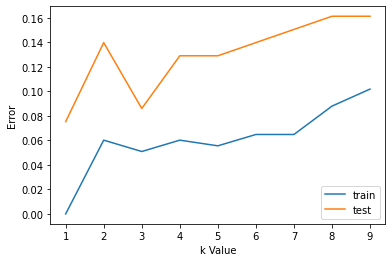

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#find best value range for k
trainError= []
testError= []
for k in range(1,10):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    trainError.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    testError.append(np.mean(y_test!= y_pred2))

plt.plot(range(1,10),trainError,label="train")
plt.plot(range(1,10),testError,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

Find best K-Folds accuracy Score for range 3-5 where k error for both test and train is low

3 NN accuracy score: 0.9030107526881721
4 NN accuracy score: 0.906236559139785
5 NN accuracy score: 0.8965591397849462
Best KNN: 4 NN with an accuracy of 0.906236559139785


Text(0.5, 0, 'k Value')

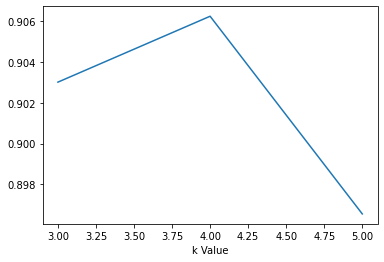

In [ ]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

i = 0 #iterator


#kfolds
kf = KFold(n_splits=10, random_state = 1, shuffle=True)

fResults = []

#get accuracies in k 3-5
for k in range(3,6):
  knn= KNeighborsClassifier(n_neighbors=k)
  f = np.mean(cross_val_score(knn, features, numLabels, cv=kf))
  fResults.append(f)
  print(str(k),'NN accuracy score:', f)

#find best tree result
#get index
bestAcc = (np.where(fResults == np.max(fResults)))[0][0]

#print best score (add 3 as we start to analyze best K from 3)
print('Best KNN:', str(bestAcc + 3), 'NN', 'with an accuracy of', np.max(fResults))

plt.plot(range(3,6),fResults)
plt.xlabel('k Value')

[[40  3  0]
 [ 1 25  6]
 [ 1  1 16]]


Text(69.0, 0.5, 'True Label')

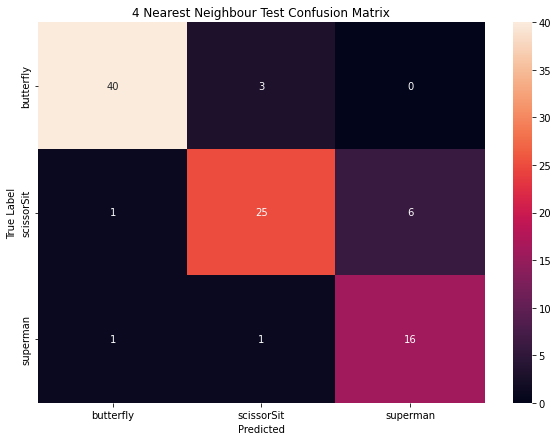

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#get predictions of best KNN
knn= KNeighborsClassifier(n_neighbors=(bestAcc + 3))
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
title = str(bestAcc + 3) + " Nearest Neighbour Test Confusion Matrix"


#confusion matrix
classLabels = le.classes_
the_matrix = confusion_matrix(y_pred, y_test, labels=np.unique(numLabels))
print(the_matrix)

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')
#cfm_plot.figure.savefig("cfm.png")

#Test on frames not part of training videos

In [ ]:
oosTestdf = pd.read_csv('/content/gdrive/MyDrive/pointYourPoseResearchColabs/poleTestCsvOut.csv',header=None)
oosTestdf.head

<bound method NDFrame.head of                     0           1          2          3           4    \
0     supermanTest0.jpg    superman  769.07916  840.61370  -314.27542   
1     supermanTest1.jpg    superman  797.95605  813.78970   133.36862   
2    supermanTest12.jpg    superman  507.41013  845.87067  -832.29400   
3    supermanTest14.jpg    superman  491.73050  935.00340 -1663.12270   
4     supermanTest2.jpg    superman  822.59850  788.92020  -339.69373   
..                  ...         ...        ...        ...         ...   
67  scissorSitTest5.jpg  scissorSit  934.22925  894.17880  -774.44870   
68  scissorSitTest6.jpg  scissorSit  948.81770  855.78656  -590.69104   
69  scissorSitTest7.jpg  scissorSit  948.47797  845.42550  -756.23773   
70  scissorSitTest8.jpg  scissorSit  920.29614  841.05994  -670.33563   
71  scissorSitTest9.jpg  scissorSit  910.21075  830.04144  -727.25037   

          5          6            7          8          9    ...          91   \
0   785.4259

In [ ]:
#get labels
testlabels = oosTestdf.iloc[:,1]

#code labels
leT = preprocessing.LabelEncoder()
leT.fit(labels)

testNumLabels = leT.transform(testlabels)
print(np.unique(testNumLabels))
print(leT.classes_)
testFeatures = oosTestdf.iloc[:,2:]

[0 1 2]
['butterfly' 'scissorSit' 'superman']


[[31  0  0]
 [ 0 19  0]
 [ 0 10 12]]
4 Nearest Neighbour Accuracy: 0.8611111111111112


Text(69.0, 0.5, 'True Label')

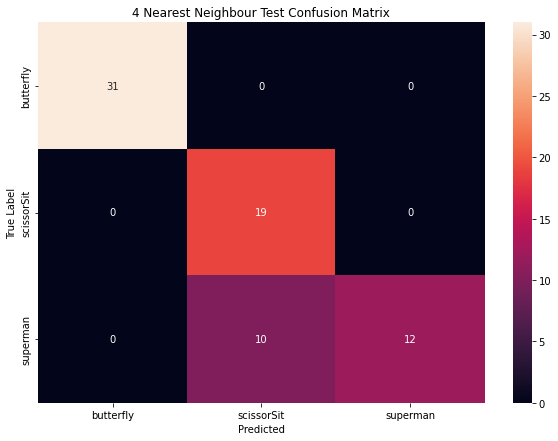

In [ ]:
y_pred = knn.predict(testFeatures)
title = str(bestAcc + 3) + " Nearest Neighbour Test Confusion Matrix"


#confusion matrix
classLabels = leT.classes_
the_matrix = confusion_matrix(y_pred, testNumLabels, labels=np.unique(testNumLabels))
print(the_matrix)

print(str(bestAcc+3), "Nearest Neighbour Accuracy:", str(accuracy_score(testNumLabels, y_pred)))

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')